In [191]:
## IMPORT DATA FROM OPENMETEO AI

In [192]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "vietnam_63provinces_ALL_VARS_weather_sample_20250531_20250607.csv"
df = pd.read_csv(url)
df.head()

province  latitude_query  longitude_query            time  temperature_2m  \
0  An Giang          10.524         105.1248  5/31/2025 0:00            26.8   
1  An Giang          10.524         105.1248  5/31/2025 1:00            26.2   
2  An Giang          10.524         105.1248  5/31/2025 2:00            26.1   
3  An Giang          10.524         105.1248  5/31/2025 3:00            25.9   
4  An Giang          10.524         105.1248  5/31/2025 4:00            25.9   

   relative_humidity_2m  dew_point_2m  apparent_temperature  \
0                    91          25.2                  33.0   
1                    94          25.2                  32.6   
2                    95          25.2                  32.4   
3                    96          25.2                  32.2   
4                    95          25.0                  32.0   

   precipitation_probability  precipitation  ...  direct_radiation_instant  \
0                          0            0.0  ...                       0.0   
1                          3            0.0  ...                       0.0   
2                          3            0.0  ...                       0.0   
3                          5            0.0  ...                       0.0   
4                          5            0.0  ...                       0.0   

   diffuse_radiation_instant  direct_normal_irradiance_instant  \
0                        0.0                               0.0   
1                        0.0                               0.0   
2                        0.0                               0.0   
3                        0.0                               0.0   
4                        0.0                               0.0   

   terrestrial_radiation_instant  uv_index  uv_index_clear_sky  cape  \
0                            0.0       0.0                 0.0  1500   
1                            0.0       0.0                 0.0  1270   
2                            0.0       0.0                 0.0  1210   
3                            0.0       0.0                 0.0  1070   
4                            0.0       0.0                 0.0  1080   

   lifted_index  is_day  sunshine_duration  
0          -2.9       0                0.0  
1          -3.0       0                0.0  
2          -3.5       0                0.0  
3          -3.8       0                0.0  
4          -3.7       0                0.0  

[5 rows x 64 columns]

In [193]:
## EDA - CHECKING DESCRIBE OF DATA

In [194]:
print(df.dtypes)
print(df.describe())
print(df.nunique())
for col in df.columns:
    print("Col: ", col)
    print(df[col].unique())

province               object
latitude_query        float64
longitude_query       float64
time                   object
temperature_2m        float64
                       ...   
uv_index_clear_sky    float64
cape                    int64
lifted_index          float64
is_day                  int64
sunshine_duration     float64
Length: 64, dtype: object
       latitude_query  longitude_query  temperature_2m  relative_humidity_2m  \
count    12096.000000     12096.000000    12096.000000          12096.000000   
mean        16.072851       106.408071       28.711930             79.737434   
std          4.874716         1.353609        3.388534             13.386561   
min          9.173000       103.016800       17.600000             32.000000   
25%         10.951900       105.636700       26.600000             72.000000   
50%         16.047900       106.183100       28.300000             83.000000   
75%         21.028500       107.185900       30.700000             91.000000   
max 

In [195]:
df.isnull().sum()

province              0
latitude_query        0
longitude_query       0
time                  0
temperature_2m        0
                     ..
uv_index_clear_sky    0
cape                  0
lifted_index          0
is_day                0
sunshine_duration     0
Length: 64, dtype: int64

In [196]:
## CHECKING OUTLINERS

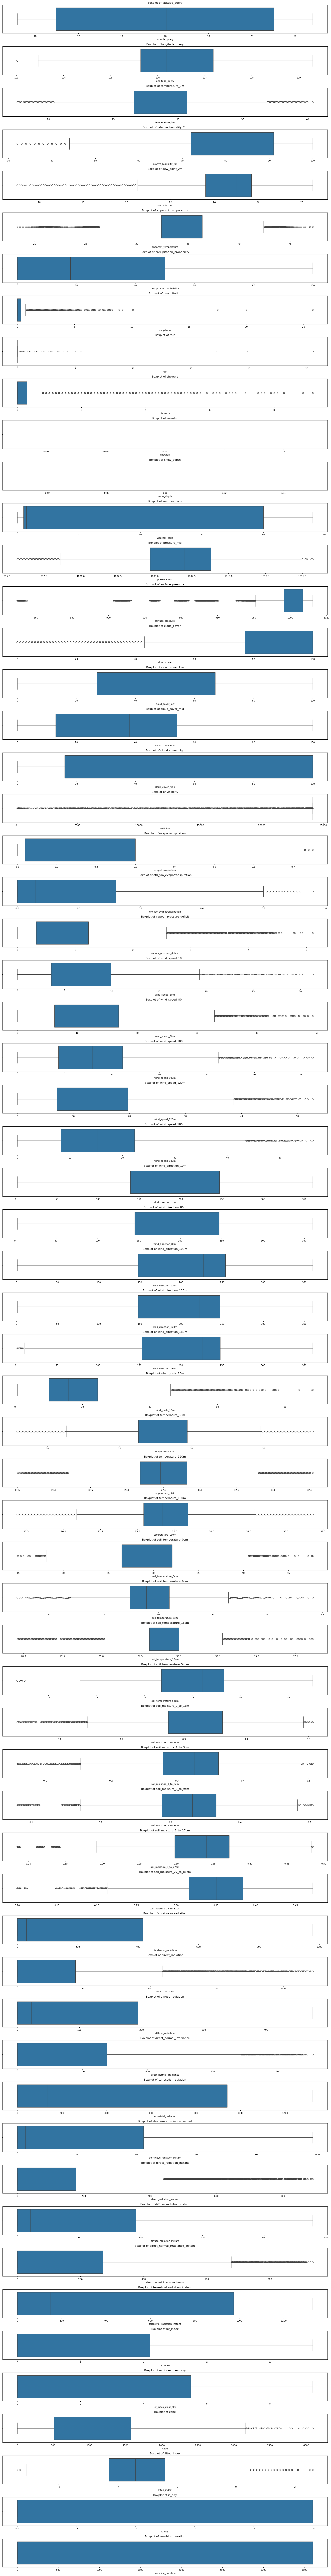

In [197]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

plt.figure(figsize=(20, len(numeric_cols) * 2.5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [198]:
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# Hiển thị theo thứ tự giảm dần
outlier_summary = dict(sorted(outlier_summary.items(), key=lambda item: item[1], reverse=True))
print("Số lượng outliers theo từng cột:")
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")


Số lượng outliers theo từng cột:
precipitation: 1835 outliers
surface_pressure: 1835 outliers
showers: 1814 outliers
visibility: 1790 outliers
cloud_cover: 1135 outliers
direct_radiation: 1017 outliers
direct_radiation_instant: 1012 outliers
soil_temperature_18cm: 974 outliers
soil_moisture_27_to_81cm: 922 outliers
temperature_180m: 809 outliers
temperature_120m: 723 outliers
apparent_temperature: 697 outliers
temperature_80m: 649 outliers
vapour_pressure_deficit: 618 outliers
direct_normal_irradiance_instant: 586 outliers
direct_normal_irradiance: 447 outliers
temperature_2m: 412 outliers
soil_temperature_6cm: 367 outliers
soil_moisture_9_to_27cm: 342 outliers
pressure_msl: 341 outliers
soil_moisture_0_to_1cm: 332 outliers
dew_point_2m: 291 outliers
wind_speed_10m: 290 outliers
wind_gusts_10m: 274 outliers
wind_speed_80m: 234 outliers
soil_temperature_0cm: 223 outliers
soil_moisture_3_to_9cm: 210 outliers
longitude_query: 192 outliers
soil_temperature_54cm: 192 outliers
relative_humid

In [199]:
## REPLACE OUTLINERS WITH MEDIAN VALUES

In [200]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[col].median()
    df[col] = df[col].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

In [201]:
## VALUES REMAINING

In [202]:
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = outliers.shape[0]

outlier_summary = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outliers Remaining'])
outlier_summary = outlier_summary[outlier_summary['Outliers Remaining'] > 0]
display(outlier_summary)

Outliers Remaining
temperature_2m                                   175
relative_humidity_2m                              74
dew_point_2m                                     125
apparent_temperature                             350
precipitation                                   2755
showers                                         2761
pressure_msl                                     246
surface_pressure                                 628
cloud_cover                                     1259
vapour_pressure_deficit                          255
wind_speed_10m                                    71
wind_speed_80m                                    48
wind_speed_100m                                   21
wind_speed_120m                                   18
wind_speed_180m                                   23
wind_gusts_10m                                   100
temperature_80m                                  289
temperature_120m                                 335
temperature_180m                                 423
soil_temperature_0cm                             123
soil_temperature_6cm                             178
soil_temperature_18cm                            689
soil_temperature_54cm                              3
soil_moisture_0_to_1cm                            81
soil_moisture_1_to_3cm                            69
soil_moisture_3_to_9cm                            75
soil_moisture_9_to_27cm                           54
soil_moisture_27_to_81cm                         379
direct_radiation                                1520
direct_normal_irradiance                         450
direct_radiation_instant                        1506
direct_normal_irradiance_instant                 734
cape                                               3

In [203]:
## FEATURE "is_hot_day" WITH CONDITION "> 30"

In [204]:
df = df.dropna()
df['is_hot_day'] = (df['temperature_2m'] > 30).astype(int)

print(df["is_hot_day"].value_counts())

is_hot_day
0    8692
1    3404
Name: count, dtype: int64


In [205]:
## CHECKING CORR_MATRIX WITH > 0.6

In [206]:
corr_matrix = df.corr(numeric_only=True)
corr_temp = corr_matrix["temperature_2m"].drop("temperature_2m").sort_values(ascending=False)

high_corr_features = corr_temp[abs(corr_temp) > 0.6]
print(high_corr_features)

soil_temperature_6cm          0.873525
temperature_80m               0.857139
soil_temperature_0cm          0.847237
apparent_temperature          0.824713
temperature_120m              0.817361
is_hot_day                    0.785486
vapour_pressure_deficit       0.781751
temperature_180m              0.773880
et0_fao_evapotranspiration    0.648333
evapotranspiration            0.633390
shortwave_radiation           0.602472
relative_humidity_2m         -0.806648
Name: temperature_2m, dtype: float64


In [207]:
## 5 CLASSIFICATION MODELS

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

df_cls = df.copy()

selected_features = list(set(high_corr_features.index.tolist()))
if "is_hot_day" in selected_features:
    selected_features.remove("is_hot_day")
    

df_classification = df_cls[selected_features + ["is_hot_day"]].dropna()

X_cls = df_classification[selected_features]
y_cls = df_classification["is_hot_day"]

scaler = StandardScaler()
X_cls_scaled = scaler.fit_transform(X_cls)


X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls_scaled, y_cls, test_size=0.2, random_state=42
)

classification_models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SVC": SVC()
}

cls_results = []

for name, model in classification_models.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred = model.predict(X_test_cls)
    acc = accuracy_score(y_test_cls, y_pred)
    prec = precision_score(y_test_cls, y_pred, zero_division=0)
    rec = recall_score(y_test_cls, y_pred)
    f1 = f1_score(y_test_cls, y_pred)
    cls_results.append((name, acc, prec, rec, f1))

cls_results_df = pd.DataFrame(cls_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
cls_results_df.sort_values(by="F1 Score", ascending=False, inplace=True)
cls_results_df.reset_index(drop=True, inplace=True)
cls_results_df

Model  Accuracy  Precision    Recall  F1 Score
0        RandomForest  0.987603   0.980057  0.977273  0.978663
1    GradientBoosting  0.983884   0.970297  0.974432  0.972360
2                 SVC  0.980165   0.958101  0.974432  0.966197
3        DecisionTree  0.977273   0.955119  0.967330  0.961186
4  LogisticRegression  0.961157   0.932011  0.934659  0.933333

In [209]:
print(y_test_cls[:10])
print(y_pred[:10])

468      1
11620    0
538      1
5265     0
7484     0
7952     1
6074     0
6345     0
7073     0
4929     0
Name: is_hot_day, dtype: int32
[1 0 1 0 0 1 0 0 0 0]


In [210]:
## VISUAL FOR 5 CLASSIFICATION MODELS

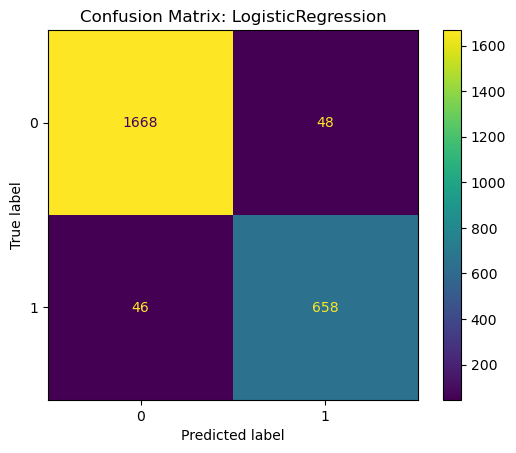

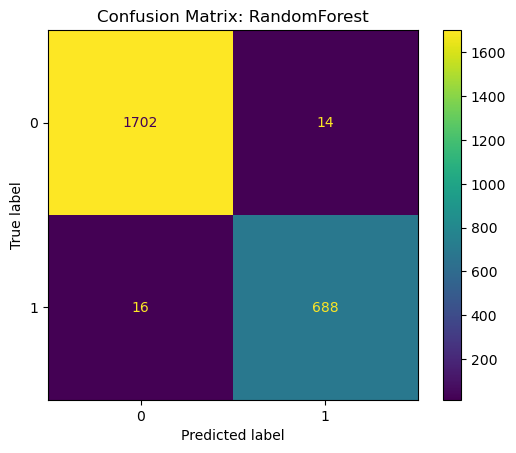

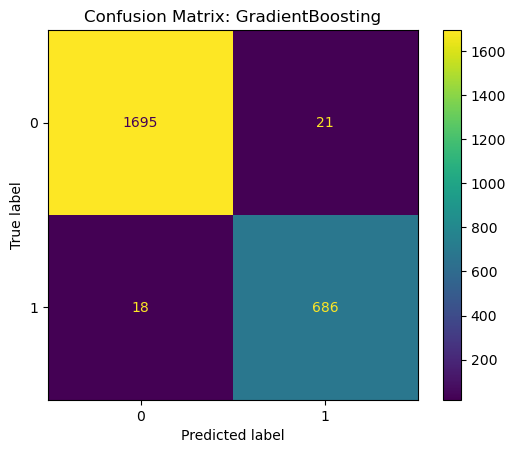

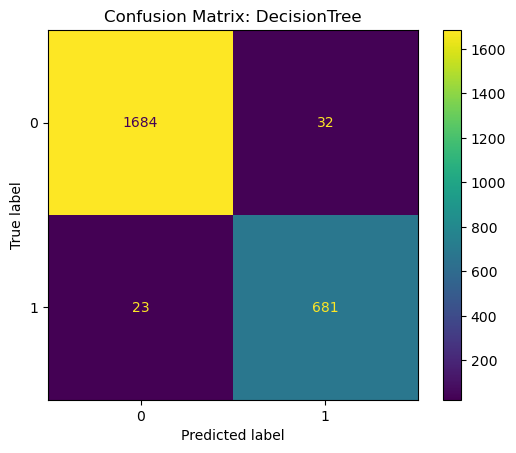

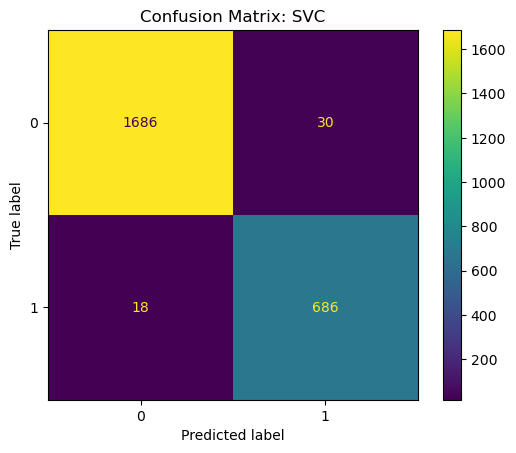

In [211]:
for name, model in classification_models.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred = model.predict(X_test_cls)
    cm = confusion_matrix(y_test_cls, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f"Confusion Matrix: {name}")
    plt.show()

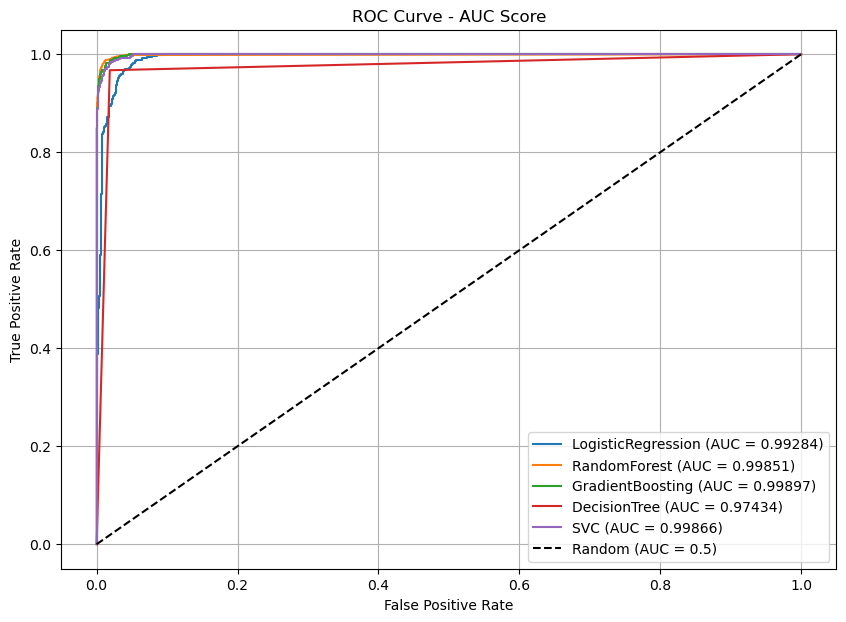

In [212]:
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(10, 7))

for name, model in classification_models.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_cls)[:, 1]
    else:
        if hasattr(model, "decision_function"):
            y_score = model.decision_function(X_test_cls)
        else:
            continue
    fpr, tpr, _ = roc_curve(y_test_cls, y_score)
    auc = roc_auc_score(y_test_cls, y_score)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.5f})")

plt.plot([0, 1], [0, 1], "k--", label="Random (AUC = 0.5)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AUC Score")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [213]:
## 5 REGRESSION MODELS

In [214]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


df_reg = df.copy()

target = 'temperature_2m'

corr_matrix = df_reg.corr(numeric_only=True)
corr_temp = corr_matrix[target].drop(target).sort_values(ascending=False)

selected_features = corr_temp[abs(corr_temp) > 0.6].index.tolist()

X = df_reg[selected_features]
y = df_reg[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, mse, r2))

results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "R^2"])
results_df.sort_values(by="R^2", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df


Model       MAE       MSE       R^2
0      RandomForest  0.120257  0.061918  0.992661
1      DecisionTree  0.181928  0.148762  0.982367
2  GradientBoosting  0.242051  0.161677  0.980836
3  LinearRegression  0.451679  0.747527  0.911394
4               SVR  0.641208  1.300515  0.845847

In [215]:
## VISUAL 5 REGRESSION MODELS

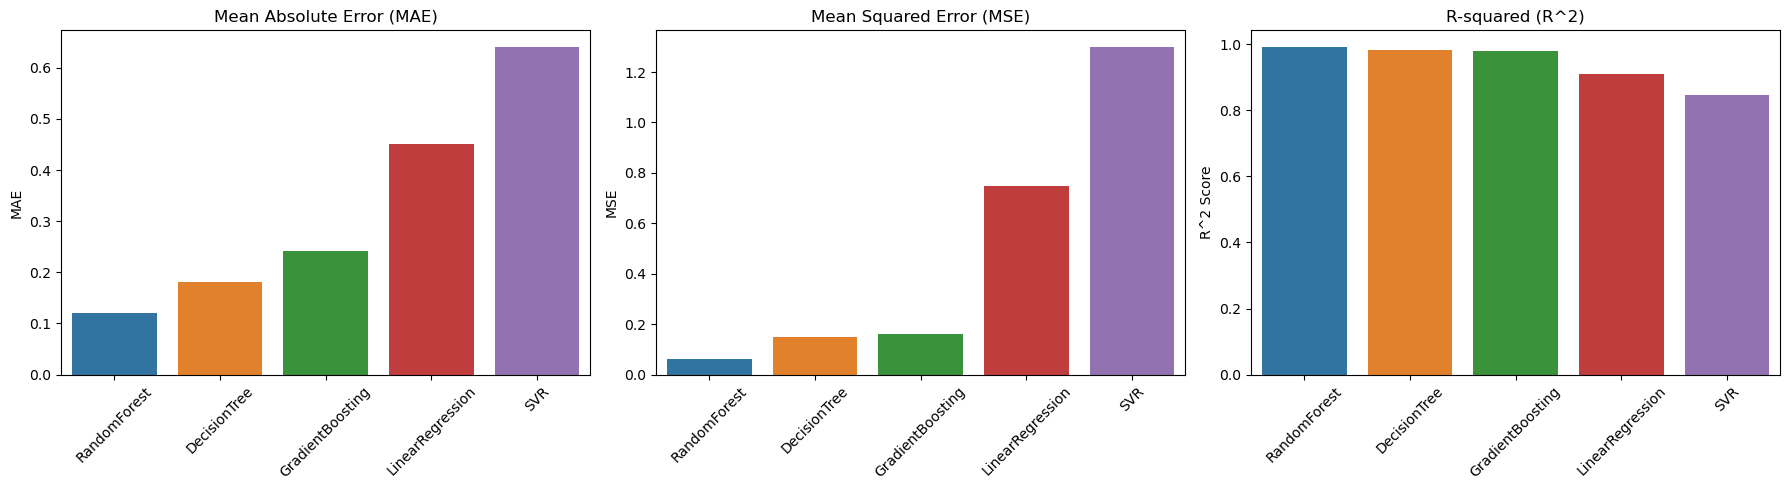

In [216]:
palette = sns.color_palette("tab10", n_colors=len(results_df))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=results_df, x='Model', y='MAE', hue='Model', palette='tab10', ax=axes[0], legend=False)
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE')
axes[0].set_xlabel('')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=results_df, x='Model', y='MSE', hue='Model', palette='tab10', ax=axes[1], legend=False)
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].set_ylabel('MSE')
axes[1].set_xlabel('')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(data=results_df, x='Model', y='R^2', hue='Model', palette='tab10', ax=axes[2], legend=False)
axes[2].set_title('R-squared (R^2)')
axes[2].set_ylabel('R^2 Score')
axes[2].set_xlabel('')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()